# Iris Flower Classification

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("C:/Users/Susmitha/Downloads/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Null Value Treatment

<Axes: >

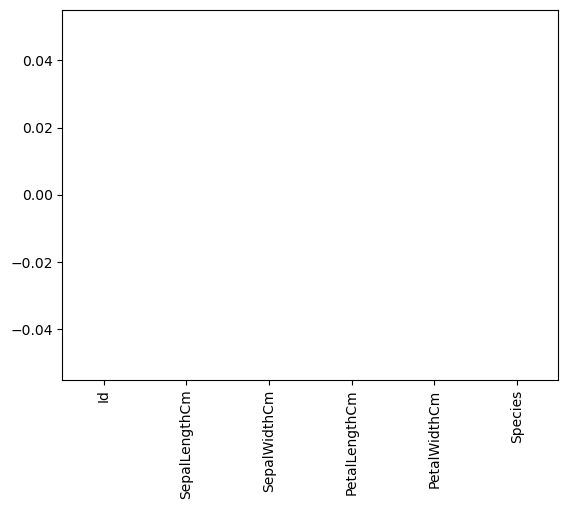

In [23]:
df.isna().sum().plot(kind='bar')

In [25]:
df['species_name']=df['Species'].map({'Iris-setosa':'setosa','Iris-versicolor':'versicolor','Iris-virginica':'virginica'})
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

  species_name  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  


In [27]:
X=df.drop(labels=['Species','species_name','Id'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
Y=df[['species_name']]
Y

,species_name
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


# Data Splitting

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
xtrain.shape

(120, 4)

In [36]:
ytrain.shape

(120, 1)

In [38]:
xtest.shape

(30, 4)

In [40]:
xtest.shape

(30, 4)

# Model 1: Logistic Regression Classifier

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
model=lr.fit(xtrain,ytrain)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
ypred=model.predict(xtest)

# a. Accuracy score

In [48]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest,ypred)
print('Accuracy Score of Logistic Regression: ',accuracy)

Accuracy Score of Logistic Regression:  1.0


# b. Confusion Matrix 

In [51]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
print("Confusion Matrix:\n",confusion_matrix(ytest,ypred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


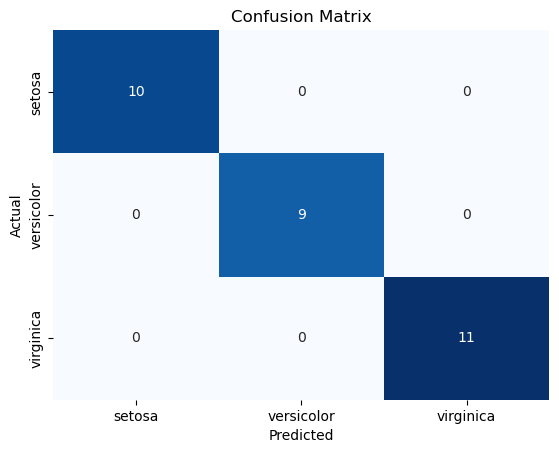

In [76]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'],cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Model 2: Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(xtrain, ytrain)
ypred_rfc = rfc_model.predict(xtest)
print("Accuracy of Random Forest Model:", accuracy_score(ytest, ypred_rfc))
print("Classification Report:\n", classification_report(ytest, ypred_rfc))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred_rfc))

Accuracy of Random Forest Model: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


D:\Anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# Model 3: Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)
ypred_dt = dt_model.predict(xtest)

print("Accuracy of Decision Tree Model:", accuracy_score(ytest, ypred_dt))
print("Classification Report:\n", classification_report(ytest, ypred_dt))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred_dt))

Accuracy of Decision Tree Model: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
